<a href="https://colab.research.google.com/github/hyunwjang/deep/blob/main/_5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_Data_API_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
builders  = tfds.list_builders()
print(builders)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'criteo', 'cs_restaurants', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_ad

In [ ]:
data, info = tfds.load('mnist', with_info = True)
train_data, tetst_data = data['train'], data['test']

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
print(info) #데이터셋의 정보확인

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [ ]:
import numpy as np

In [ ]:
num_items  =20
num_list = np.arange(num_items)


In [ ]:
num_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [ ]:
num_list_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [ ]:
import itertools
itertools.count(2,3)

count(2, 3)

In [ ]:
import itertools


def gen():

  for i in itertools.count(1):
    yield(i, [1]*i)


dataset = tf.data.Dataset.from_generator(
    gen, 
    (tf.int64, tf.int64),
    (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(3).as_numpy_iterator())

[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [ ]:
# for itmem in dataset:
#   print(item)

In [ ]:
def gen(stop):
  for i in itertools.count(1):
    if i< stop:
      yield (i,[1]*i)

dataset = tf.data.Dataset.from_generator(
    gen,args =[10], 
    output_types = (tf.int64, tf.int64),
    output_shapes = (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(9).as_numpy_iterator())

[(1, array([1])),
 (2, array([1, 1])),
 (3, array([1, 1, 1])),
 (4, array([1, 1, 1, 1])),
 (5, array([1, 1, 1, 1, 1])),
 (6, array([1, 1, 1, 1, 1, 1])),
 (7, array([1, 1, 1, 1, 1, 1, 1])),
 (8, array([1, 1, 1, 1, 1, 1, 1, 1])),
 (9, array([1, 1, 1, 1, 1, 1, 1, 1, 1]))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [ ]:
dataset = num_list_dataset.repeat(3).batch(7)

In [ ]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


In [ ]:
dataset = num_list_dataset.repeat(3).batch(7,drop_remainder = True)

In [ ]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [ ]:
from tensorflow.data import Dataset

In [ ]:
dataset = Dataset.range(1,6)
dataset = dataset.map(lambda x : x*2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [ ]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x+1)

result

<MapDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [ ]:
elements = [(1, 'one'),(2,'two'),(3,'three')]
dataset = Dataset.from_generator(lambda : elements,(tf.int32,tf.string))

result = dataset.map(lambda x_int, y_str : x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

In [ ]:
dataset = dataset.range(3)

def g(x):
  return tf.constant(10.5),tf.constant(['one','two','three'])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [ ]:
def h(x):
  return 10.5, ['one','two','three'], np.array([1.0, 2.0], dtype = np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [ ]:
def i (x):
  return(10.5,[12, 11]),"one","Two"

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [ ]:
dataset = Dataset.from_tensor_slices([1,2,3,4,5,6,7,8,9,10])
dataset = dataset.filter(lambda x : x < 5)
list(dataset.as_numpy_iterator())

[1, 2, 3, 4]

In [ ]:
def filter_fn(x):
  return tf.math.equal(x,1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteV2ZIOA/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteV2ZIOA/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteV2ZIOA/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
  print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'During a sleepless night, I was switching through the channels & found this embarrassment of a movie. What were they thinking?<br /><br />If this is life after "Remote Control" for Kari (Wuhrer) Salin, no wonder she\'s gone nowhere.<br /><br />And why did David Keith take this role? It\'s pathetic!<br /><br />Anyway, I turned on the movie near the end, so I didn\'t get much of the plot. But this must\'ve been the best part. This nerdy college kid brings home this dominatrix-ish girl...this scene is straight out of the comic books -- or the cheap porn movies. She calls the mother anal retentive and kisses the father "Oh, I didn\'t expect tongue!" Great lines!<br /><br />After this, I had to see how it ended..<br /><br />Well, of course, this bitch from hell has a helluva past, so the SWAT team is upstairs. And yes...they surround her! And YES YES! The kid blows her brains out!!!! AHAHHAHAHAHA!!<br /><br />This is must-see TV. <br />

### get_next()

In [ ]:
dataset = Dataset.range(2)
for element in dataset:
  print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
dataset =  Dataset.range(2)
iterator = iter(dataset)
print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
a = np.random.randint(0,10, size=(2,3))
print(a)
dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)


print(iterator.get_next())

[[4 8 1]
 [4 7 8]]
tf.Tensor([4 8 1], shape=(3,), dtype=int64)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation , BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [ ]:
(x_train,y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [ ]:
x_train = x_train /255.
x_test = x_test/255.

### tf.data 이용

In [ ]:
train_ds = Dataset.from_tensor_slices((x_train,y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)


test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
               'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']

              

### 데이터 확인

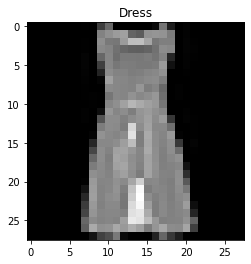

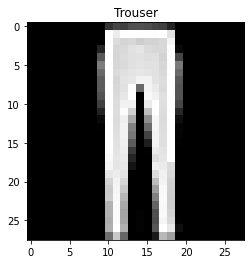

In [ ]:
for image, label in train_ds.take(2):
  plt.title("{}".format(class_names[label[0]]))
  plt.imshow(image[0,:,:],cmap ='gray')
  plt.show()



### 모델 생성
- 임의의 모델

In [ ]:
def build_model():
  input = Input(shape=(28,28), name='input')
  flatten = Flatten(input_shape = [28,28], name = 'flatten')(input)
  hidden1 = Dense(256, kernel_initializer = 'he_normal',name = 'hidden1' )(flatten)
  hidden1 = BatchNormalization()(hidden1)
  hidden1 = Activation('relu')(hidden1)
  dropout1 = Dropout(0.5)(hidden1)

  hidden2 = Dense(100, kernel_initializer = 'he_normal',name = 'hidden2' )(dropout1)
  hidden2 = BatchNormalization()(hidden2)
  hidden2 = Activation('relu')(hidden2)
  dropout2 = Dropout(0.5)(hidden2)

  hidden3 = Dense(100, kernel_initializer = 'he_normal',name = 'hidden3' )(dropout2)
  hidden3 = BatchNormalization()(hidden3)
  hidden3 = Activation('relu')(hidden3)
  dropout3 = Dropout(0.5)(hidden3)

  hidden4 = Dense(50, kernel_initializer = 'he_normal',name = 'hidden4' )(dropout3)
  hidden4 = BatchNormalization()(hidden4)
  hidden4 = Activation('relu')(hidden4)
  dropout4 = Dropout(0.5)(hidden4)


  output = Dense(10, activation = 'softmax', name = 'output')(dropout4)

  model = Model(inputs = [input], outputs = output)

  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_20 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 256)               0         
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                           

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
train_loss = tf.keras.metrics.Mean(name ='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [ ]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)
  

In [ ]:
epochs = 20

for epoch in range(epochs):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = "Epochs {:3d}\tLoss:{:.4f}\tAccuracy:{:4f}\tTest Loss:{:4f}\tTest Accuracy:{:4f}\t"
  print(template.format(epoch +1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100
                        ))


Epochs   1	Loss:0.4945	Accuracy:82.023331	Test Loss:0.446030	Test Accuracy:83.450005	
Epochs   2	Loss:0.4340	Accuracy:84.101662	Test Loss:0.415859	Test Accuracy:84.619995	
Epochs   3	Loss:0.4013	Accuracy:85.231110	Test Loss:0.401388	Test Accuracy:85.159996	
Epochs   4	Loss:0.3795	Accuracy:86.015831	Test Loss:0.400528	Test Accuracy:85.114998	
Epochs   5	Loss:0.3622	Accuracy:86.622665	Test Loss:0.387834	Test Accuracy:85.711998	
Epochs   6	Loss:0.3480	Accuracy:87.111107	Test Loss:0.380612	Test Accuracy:86.046669	
Epochs   7	Loss:0.3364	Accuracy:87.523094	Test Loss:0.374238	Test Accuracy:86.320000	
Epochs   8	Loss:0.3260	Accuracy:87.884583	Test Loss:0.369413	Test Accuracy:86.557503	
Epochs   9	Loss:0.3167	Accuracy:88.213333	Test Loss:0.363975	Test Accuracy:86.801109	
Epochs  10	Loss:0.3084	Accuracy:88.504669	Test Loss:0.360964	Test Accuracy:86.959000	
Epochs  11	Loss:0.3008	Accuracy:88.773178	Test Loss:0.359110	Test Accuracy:87.092728	
Epochs  12	Loss:0.2939	Accuracy:89.015556	Test Loss:0.

### 모델 학습 : 2번째 방법 (Keras)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val= train_test_split(x_train_full, y_train_full,
                                                 test_size = 0.3,
                                                 random_state = 777)

x_train = x_train/255.
x_val = x_val/255.
x_test = x_test/255.



print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
model = build_model()
model.compile(optimizer = 'sgd', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
(10000, 28, 28)
(10000,)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_24 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 256)               0         
                                                                 
 dropout_24 (Dropout)        (None, 256)          

5~6분 소요

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stooping_cb = EarlyStopping(patience = 3, monitor = 'val_loss',
                                  restore_best_weights = True)

history = model.fit(x_train, y_train,
                    batch_size =256,
                    epochs = 200,
                    shuffle =True,
                    validation_data =(x_val, y_val),
                    callbacks = [early_stooping_cb])

Epoch 1/200
165/165 [==============================] - 5s 20ms/step - loss: 2.5788 - accuracy: 0.1379 - val_loss: 2.0062 - val_accuracy: 0.4406
Epoch 2/200
165/165 [==============================] - 3s 18ms/step - loss: 2.2253 - accuracy: 0.2106 - val_loss: 1.7623 - val_accuracy: 0.5259
Epoch 3/200
165/165 [==============================] - 3s 18ms/step - loss: 2.0247 - accuracy: 0.2739 - val_loss: 1.5988 - val_accuracy: 0.5917
Epoch 4/200
165/165 [==============================] - 3s 18ms/step - loss: 1.8846 - accuracy: 0.3261 - val_loss: 1.4679 - val_accuracy: 0.6323
Epoch 5/200
165/165 [==============================] - 4s 25ms/step - loss: 1.7581 - accuracy: 0.3771 - val_loss: 1.3542 - val_accuracy: 0.6527
Epoch 6/200
165/165 [==============================] - 5s 32ms/step - loss: 1.6653 - accuracy: 0.4074 - val_loss: 1.2427 - val_accuracy: 0.6739
Epoch 7/200
165/165 [==============================] - 3s 18ms/step - loss: 1.5779 - accuracy: 0.4387 - val_loss: 1.1489 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### 모델 평가

In [ ]:
model.evaluate(x_test,y_test, batch_size = 100)

100/100 [==============================] - 1s 7ms/step - loss: 0.5156 - accuracy: 0.8036


[0.5156012773513794, 0.803600013256073]

### 결과 확인

In [ ]:
test_img= x_test[0,:,:]
print(test_img.shape)

(28, 28)


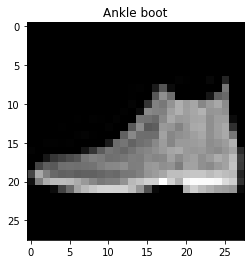

In [ ]:
plt.title(class_names[y_test[0]])
plt.imshow(test_img, cmap = 'gray')
plt.show()

In [ ]:
pred = model.predict(test_img.reshape(1,28,28))

1/1 [==============================] - 0s 340ms/step


In [ ]:
pred.shape

(1, 10)

In [ ]:
pred

array([[1.8342151e-04, 3.9713335e-04, 1.7917102e-04, 1.8589626e-04,
        1.6696086e-04, 8.2782224e-02, 1.2344874e-04, 2.9690990e-01,
        2.2625453e-03, 6.1680925e-01]], dtype=float32)

In [ ]:
class_names[np.argmax(pred)]

'Ankle boot'

### Test Batch Dataset

In [ ]:
test_batch = x_test[:32,:,:]
test_batch_y = y_test[:32]
print(test_batch.shape)

(32, 28, 28)


In [ ]:
preds = model.predict(test_batch)
preds.shape

1/1 [==============================] - 0s 34ms/step


(32, 10)

In [ ]:

preds_arg = np.argmax(preds, -1)

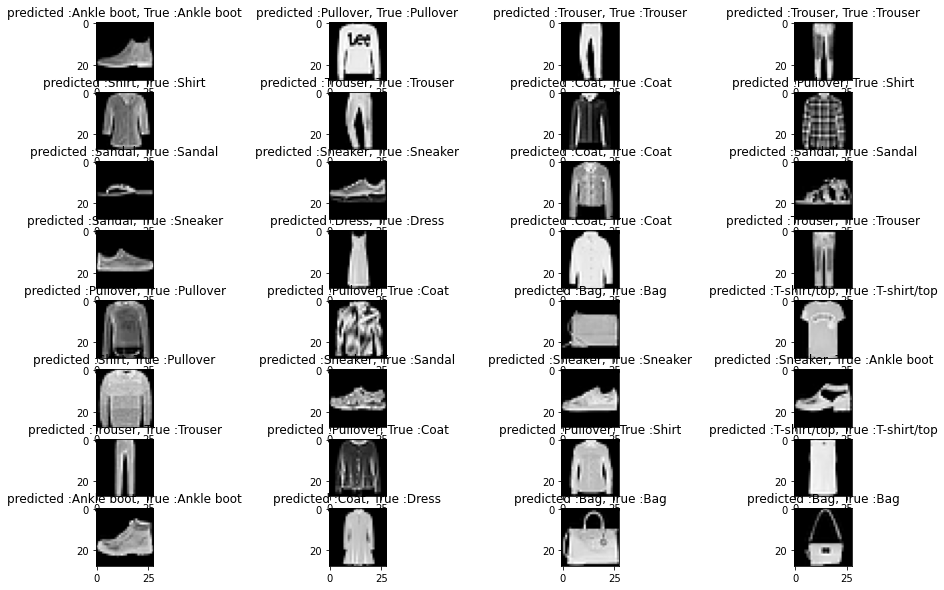

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows *num_cols

plt.figure(figsize = (16,10))

for idx in range(1,33,1):
  plt.subplot(num_rows, num_cols, idx)
  plt.title("predicted :{}, True :{}".format(class_names[preds_arg[idx-1]],
                                             class_names[test_batch_y[idx-1]]))
  plt.imshow(test_batch[idx-1],cmap = 'gray')
plt.show()